# Import important lib

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score


In [2]:
df = pd.read_csv('bikes.csv')

In [3]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
8068,Yamaha YZF-R15 150cc 2016,2016,18000 Km,first owner,ambala,\n\n 42 kmpl,16 bhp,65000
8069,Royal Enfield Thunderbird 350cc 2018,2018,4000 Km,first owner,jalandhar,\n\n 40 kmpl,19.80 bhp,150000
8070,Royal Enfield Classic 350cc 2019,2019,12000 Km,first owner,delhi,\n\n 35 kmpl,19.80 bhp,162000
8071,Royal Enfield Himalayan 410cc Fi ABS BS6 2020,2020,3000 Km,first owner,delhi,\n\n 32 kmpl,24.3 bhp,210000


In [4]:
df.shape

(8073, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8073 entries, 0 to 8072
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  8073 non-null   object
 1   model_year  8073 non-null   int64 
 2   kms_driven  8073 non-null   object
 3   owner       8073 non-null   object
 4   location    8054 non-null   object
 5   mileage     8060 non-null   object
 6   power       8041 non-null   object
 7   price       8073 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 504.7+ KB


# Drop dublicates

In [6]:
df.dropna(inplace=True)

In [7]:
duplicates = df[df.duplicated()]
print(duplicates)

                                           model_name  model_year  \
7857                              KTM Duke 200cc 2012        2012   
7858                          Bajaj Pulsar 180cc 2016        2016   
7859  TVS Apache RTR 200 4V Dual Channel ABS BS6 2020        2020   
7860                              KTM Duke 390cc 2018        2018   
7861                           Yamaha FZ16 150cc 2014        2014   
...                                               ...         ...   
8068                        Yamaha YZF-R15 150cc 2016        2016   
8069             Royal Enfield Thunderbird 350cc 2018        2018   
8070                 Royal Enfield Classic 350cc 2019        2019   
8071    Royal Enfield Himalayan 410cc Fi ABS BS6 2020        2020   
8072                      Mahindra Centuro 110cc 2014        2014   

           kms_driven        owner   location        mileage      power  \
7857         24561 Km  third owner  bangalore   \n\n 35 kmpl     25 bhp   
7858         19718 Km

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [model_name, model_year, kms_driven, owner, location, mileage, power, price]
Index: []


# Remove Mileage|Kmpl from kms_driven column 

In [10]:
count = df['kms_driven'].str.contains('Mileage|Kmpl', case=False).sum()
print(count)

1980


In [11]:
df.drop(df[df['kms_driven'].str.contains('Mileage|Kmpl', case=False)].index, inplace=True)

In [12]:
count = df['kms_driven'].str.contains('Mileage|Kmpl', case=False).sum()
print(count)

0


In [13]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25 bhp,63400
...,...,...,...,...,...,...,...,...
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 Km,first owner,ahmedabad,\n\n,16.10 bhp,60000
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


# Making box plot

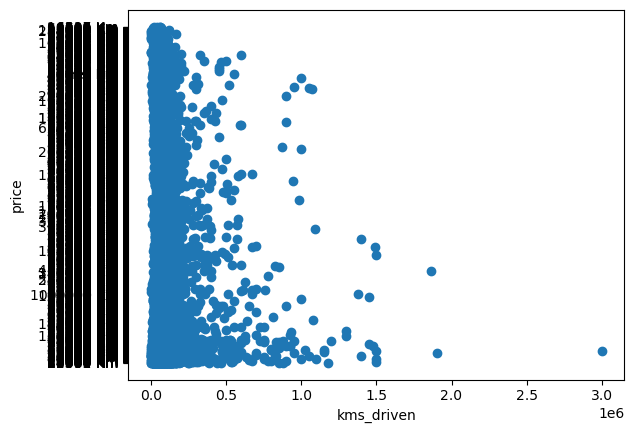

In [14]:
plt.scatter(df['price'],df['kms_driven'])
plt.ylabel('price')
plt.xlabel('kms_driven')
plt.show()

In [15]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

# Calculate num of rows that contain numeric and char

In [16]:
count = df['power'].str.contains('bhp', na=False).sum()
print(count)

4975


In [17]:
df['power'] = df['power'].str.replace('bhp', '').str.strip()

In [18]:
count = df['power'].str.contains('Bhp', na=False).sum()
print(count)

468


In [19]:
df['power'] = df['power'].str.replace('Bhp', '').str.strip()

In [20]:


def try_to_float(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

count = df['power'].apply(try_to_float).sum()
print(count)

373


In [21]:
df['power'] = pd.to_numeric(df['power'], errors='coerce')
df.dropna(subset=['power'], inplace=True)

# Rename column power

In [22]:
df.rename(columns={'power': 'Power_bhp'}, inplace=True)

In [23]:
df

,model_name,model_year,kms_driven,owner,location,mileage,Power_bhp,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.8,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28.0,300000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30.0,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25.0,63400
...,...,...,...,...,...,...,...,...
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 Km,first owner,ahmedabad,\n\n,16.1,60000
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16.0,55000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17.0,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.8,49000


# remove Unit from columns and convert into numeric

In [24]:
df['mileage'] = df['mileage'].str.replace(r'\D', '')
df['mileage'] = pd.to_numeric(df['mileage'])

C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\3888049010.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mileage'] = df['mileage'].str.replace(r'\D', '')


In [25]:
df

,model_name,model_year,kms_driven,owner,location,mileage,Power_bhp,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28.0,300000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30.0,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,35.0,25.0,63400
...,...,...,...,...,...,...,...,...
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 Km,first owner,ahmedabad,NaN,16.1,60000
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16.0,55000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17.0,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.8,49000


In [26]:
df['kms_driven'] = df['kms_driven'].str.replace(r' ?', '')
df['kms_driven'] = df['kms_driven'].str.replace(r'km?', '')
df['kms_driven'] = df['kms_driven'].str.replace(r'Km?', '')
df['kms_driven'] = df['kms_driven'].str.replace(r'Yes?', '')
df['kms_driven'] = pd.to_numeric(df['kms_driven'])

C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\1870475286.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kms_driven'] = df['kms_driven'].str.replace(r' ?', '')
C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\1870475286.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kms_driven'] = df['kms_driven'].str.replace(r'km?', '')
C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\1870475286.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kms_driven'] = df['kms_driven'].str.replace(r'Km?', '')
C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\1870475286.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['kms_driven'] = df['kms_driven'].str.replace(r'Yes?', '')


In [27]:
df['owner'].unique()

array(['first owner', 'third owner', 'second owner',
       'fourth owner or more'], dtype=object)

In [28]:
owner_map = {
    'first owner': 1,
    'second owner': 2,
    'third owner': 3,
    'fourth owner or more': 4
}

df['owner'] = df['owner'].replace(owner_map)
df['owner'] = pd.to_numeric(df['owner'])

In [29]:
df.dtypes

model_name     object
model_year      int64
kms_driven    float64
owner           int64
location       object
mileage       float64
Power_bhp     float64
price           int64
dtype: object

In [30]:
df.shape

(5443, 8)

# Drop missing values

In [31]:
df.dropna(inplace=True)

In [32]:

null_values = df.isnull().sum()

print(null_values)

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
Power_bhp     0
price         0
dtype: int64


In [33]:
df.dtypes

model_name     object
model_year      int64
kms_driven    float64
owner           int64
location       object
mileage       float64
Power_bhp     float64
price           int64
dtype: object

# Calculate outliers and remove it

In [34]:


# Identify the numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Calculate the z-score for each value
z_scores = stats.zscore(df[numeric_cols])

# Define the threshold z-score value
threshold = 3

# Use boolean indexing to filter out the rows that contain outliers
df = df[(z_scores < threshold).all(axis=1)]



In [35]:
df

,model_name,model_year,kms_driven,owner,location,mileage,Power_bhp,price
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,1,hyderabad,35.0,19.0,63500
1,Royal Enfield Classic 350cc 2016,2016,50000.0,1,hyderabad,35.0,19.8,115000
2,Hyosung GT250R 2012,2012,14795.0,1,hyderabad,30.0,28.0,300000
6,Bajaj Pulsar 180cc 2016,2016,19718.0,1,bangalore,65.0,17.0,55000
8,KTM Duke 390cc 2018,2018,1350.0,1,jaipur,25.0,42.9,198000
...,...,...,...,...,...,...,...,...
7849,Hero Karizma ZMR 223cc 2011,2011,66780.0,1,alipore,48.0,20.0,39899
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,1,agra,42.0,16.0,55000
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,1,bangalore,65.0,17.0,61740
7855,Bajaj V15 150cc 2016,2016,7524.0,1,bangalore,57.0,11.8,49000


# 29 Questions About DataSet

In [36]:
# 1) How many motorcycles were manufactured in each year?
motorcycles_per_year = df['model_year'].value_counts()
print(motorcycles_per_year)


2017    765
2016    710
2018    583
2015    516
2014    414
2019    360
2013    247
2012    171
2020    166
2011    142
2010    103
2009     80
2008     44
2021     42
2006     36
2007     28
2005     24
2004     18
2001      9
2002      7
2003      6
1991      4
1997      4
1996      3
2000      2
1994      1
1999      1
1986      1
1990      1
Name: model_year, dtype: int64


In [37]:
# 2) What is the average number of kilometers driven for motorcycles in each location?
average_kms_driven_by_location = df.groupby('location')['kms_driven'].mean()
print(average_kms_driven_by_location)


location
24 pargana      15964.6
adilabad        14500.0
adoni            9000.0
adyar           16000.0
agartala        23400.0
                 ...   
warangal        57000.0
wardha          19165.0
washim           7550.0
yamuna nagar    15881.0
zirakpur        28400.0
Name: kms_driven, Length: 406, dtype: float64


In [38]:
# 3) How many motorcycles have a mileage less than the average mileage of all motorcycles?
average_mileage_all_motorcycles = df['mileage'].mean()
motorcycles_below_average_mileage = df[df['mileage'] < average_mileage_all_motorcycles]


In [39]:

# 4) What is the maximum mileage among the motorcycles?
max_mileage = df['mileage'].max()
print(max_mileage)


458.0


In [40]:

# 5) What is the average power output of motorcycles in each location?
average_power_by_location = df.groupby('location')['Power_bhp'].mean()
print(average_power_by_location)


location
24 pargana      20.400000
adilabad        16.000000
adoni           25.100000
adyar           25.000000
agartala        17.440000
                  ...    
warangal        16.700000
wardha          18.100000
washim          12.200000
yamuna nagar    19.166667
zirakpur        22.760000
Name: Power_bhp, Length: 406, dtype: float64


In [41]:

# 6) How many motorcycles were manufactured in each owner category?
motorcycles_per_owner = df['owner'].value_counts()
print(motorcycles_per_owner)


1    3979
2     509
Name: owner, dtype: int64


In [42]:

# 8) How many motorcycles have a mileage greater than 40 kmpl and a power output greater than 20 bhp?
motorcycles_with_high_mileage_power = df[(df['mileage'] > 40) & (df['Power_bhp'] > 20)]
print(len(motorcycles_with_high_mileage_power))


57


In [43]:

# 9) What is the average price of motorcycles in each location for motorcycles with a mileage greater than 30 kmpl?
average_price_high_mileage_by_location = df[df['mileage'] > 30].groupby('location')['price'].mean()
print(average_price_high_mileage_by_location)


location
24 pargana       69875.000000
adilabad         50000.000000
adoni           150000.000000
adyar           130000.000000
agartala        115000.000000
                    ...      
warangal         75000.000000
wardha           89285.000000
washim           92500.000000
yamuna nagar     77000.000000
zirakpur         83466.666667
Name: price, Length: 368, dtype: float64


In [44]:

# 10) How many motorcycles have a price greater than 100,000 and a power output greater than 25 bhp?
motorcycles_expensive_high_power = df[(df['price'] > 100000) & (df['Power_bhp'] > 25)]
print(len(motorcycles_expensive_high_power))


775


In [45]:

# 11) What is the average number of kilometers driven for motorcycles with a model year of 2018 or later?
average_kms_driven_newer_models = df[df['model_year'] >= 2018]['kms_driven'].mean()
print(average_kms_driven_newer_models)


12433.770634231103


In [46]:

# 12) How many motorcycles have a price between 50,000 and 100,000?
motorcycles_price_range = df[(df['price'] >= 50000) & (df['price'] <= 100000)]
print(len(motorcycles_price_range))


1432


In [47]:

# 13) What is the maximum power output among the motorcycles?
max_power = df['Power_bhp'].max()
print(max_power)


72.68


In [48]:

# 14) How many motorcycles have a mileage greater than 35 kmpl and a price less than 75,000?
motorcycles_high_mileage_low_price = df[(df['mileage'] > 35) & (df['price'] < 75000)]
print(len(motorcycles_high_mileage_low_price))


1746


In [49]:

# 15) What is the average price of motorcycles in each location for motorcycles with a power output greater than 30 bhp?
average_price_high_power_by_location = df[df['Power_bhp'] > 30].groupby('location')['price'].mean()
print(average_price_high_power_by_location)


location
24 pargana       215000.0
ahmedabad        244800.0
ahmednagar       250000.0
akola            200000.0
alibag           210000.0
                   ...   
unnao            205000.0
vadodara         189100.0
virar            145000.0
visakhapatnam    145000.0
zirakpur         200000.0
Name: price, Length: 99, dtype: float64


In [50]:

# 16) How many motorcycles have a price greater than the average price of all motorcycles?
average_price_all_motorcycles = df['price'].mean()
motorcycles_above_average_price = df[df['price'] > average_price_all_motorcycles]
print(len(motorcycles_above_average_price))


1812


In [51]:

# 17) What is the minimum mileage among the motorcycles?
min_mileage = df['mileage'].min()
print(min_mileage)


5.0


In [52]:

# 18) How many motorcycles have a price less than 50,000 and a power output less than 15 bhp?
motorcycles_low_price_low_power = df[(df['price'] < 50000) & (df['Power_bhp'] < 15)]
print(len(motorcycles_low_price_low_power))


854


In [53]:

# 19) What is the average number of kilometers driven for motorcycles in each owner category?
average_kms_driven_by_owner = df.groupby('owner')['kms_driven'].mean()
print(average_kms_driven_by_owner)


owner
1    21291.721035
2    28256.891945
Name: kms_driven, dtype: float64


In [54]:

# 20) How many motorcycles have a mileage between 25 kmpl and 35 kmpl?
motorcycles_mileage_range = df[(df['mileage'] >= 25) & (df['mileage'] <= 35)]
print(len(motorcycles_mileage_range))


1762


In [55]:

# 21) What is the maximum price among the motorcycles?
max_price = df['price'].max()
print(max_price)


550000


In [56]:

# 22) How many motorcycles have a power output between 10 bhp and 20 bhp?
motorcycles_power_range = df[(df['Power_bhp'] >= 10) & (df['Power_bhp'] <= 20)]
print(len(motorcycles_power_range))


2487


In [57]:

# 23) What is the average price of motorcycles in each location for motorcycles with a mileage less than 20 kmpl?
average_price_low_mileage_by_location = df[df['mileage'] < 20].groupby('location')['price'].mean()
print(average_price_low_mileage_by_location)


location
agra             23000.000000
ahmedabad        36636.666667
ajmer            21000.000000
bangalore       151536.000000
bharatpur        49400.000000
bhubaneshwar     28500.000000
chakan          346600.000000
chandigarh      545000.000000
chennai          46692.307692
chittorgarh      51000.000000
delhi            84880.095238
ernakulam        29339.000000
faridabad        17566.666667
ghaziabad       515000.000000
gurgaon          91750.000000
hyderabad       145179.000000
jaipur           34160.000000
jind             16666.000000
kolkata          20000.000000
kurukshetra      18750.000000
ludhiana         22300.000000
mulbagal         33000.000000
mumbai          225935.500000
noida            19051.000000
nokha            19280.000000
pune            121160.000000
thane            42000.000000
tiruvallur       37051.333333
vadodara         33789.142857
varanasi         20000.000000
Name: price, dtype: float64


In [58]:

# 24) How many motorcycles have a price less than 25,000 and a power output less than 10 bhp?
motorcycles_cheap_low_power = df[(df['price'] < 25000) & (df['Power_bhp'] < 10)]
print(len(motorcycles_cheap_low_power))


216


In [59]:

# 25) What is the average mileage among the motorcycles?
average_mileage = df['mileage'].mean()
print(average_mileage)


43.59692513368984


In [60]:

# 26) How many motorcycles have a price greater than 75,000 and a mileage greater than 30 kmpl?
motorcycles_expensive_high_mileage = df[(df['price'] > 75000) & (df['mileage'] > 30)]
print(len(motorcycles_expensive_high_mileage))


1792


In [61]:

# 27) What is the maximum number of kilometers driven among the motorcycles?
max_kms_driven = df['kms_driven'].max()
print(max_kms_driven)


110000.0


In [62]:

# 28) How many motorcycles have a price between 30,000 and 50,000?
motorcycles_price_range_2 = df[(df['price'] >= 30000) & (df['price'] <= 50000)]
print(len(motorcycles_price_range_2))



812


In [63]:
# 29) What is the average power output of motorcycles in each owner category?
average_power_by_owner = df.groupby('owner')['Power_bhp'].mean()
print(average_power_by_owner)

owner
1    20.421181
2    21.456365
Name: Power_bhp, dtype: float64


# Label Encoder 

In [64]:
label_encoder = LabelEncoder()
df['model_name'] = label_encoder.fit_transform(df['model_name'])
df['location'] = label_encoder.fit_transform(df['location'])

C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\3703064095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = label_encoder.fit_transform(df['model_name'])
C:\Users\kemst\AppData\Local\Temp\ipykernel_13596\3703064095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = label_encoder.fit_transform(df['location'])


# Select coulmn to predict

In [65]:
X = df.drop('price', axis=1)
y = df['price']

# Apply Model

In [66]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

# R-squared score

In [67]:
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
print("Accurcy: ", r2*100,"% --> R-squared score")

Accurcy:  74.17049217713708 % --> R-squared score
